This Jupyter Notebook should quickly showcase the main function that works so far

First, import the necessaty libraries and create a helper function

In [1]:
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, './utils/')

from LinearDeformationField import *
from HelperFunctions import *
import numpy as np
import matplotlib.pyplot as plt

Now show the segmentation map (simplified map) and the image

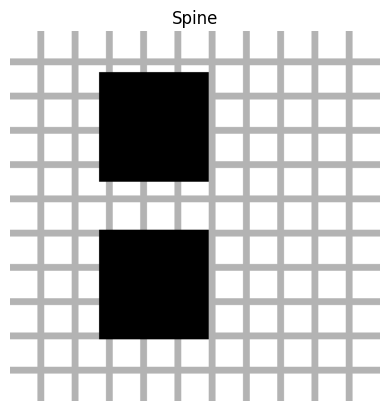

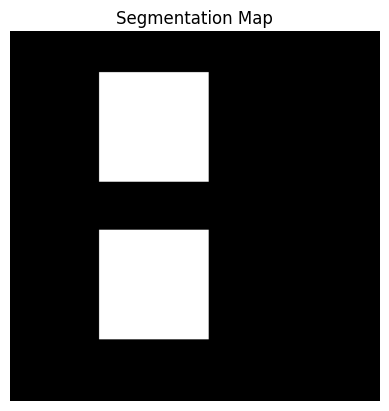

In [2]:
spine_path = './tests/test_data/squares_high_res.png' 
spine_array = load_png_as_grayscale(spine_path)

segmentation_path = './tests/test_data/segmap_high_res.png'
segmentation_map = load_png_as_grayscale(segmentation_path)

# Display the grayscale image
plt.imshow(spine_array, cmap='gray')
plt.title("Spine")
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# Display the grayscale image
plt.imshow(segmentation_map, cmap='gray')
plt.title("Segmentation Map")
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

np.max(segmentation_map/255)
segmentation_map = segmentation_map

The next step is just a small workaround that loads a perlin noise map instead of freeformdeformation

In [3]:
#load a perlin noise map
perlin_x_path = './tests/test_data/perlin_high_res_1.png'
perlin_x = load_png_as_grayscale(perlin_x_path)
perlin_y_path = './tests/test_data/perlin_high_res_2.png'
perlin_y = load_png_as_grayscale(perlin_y_path)

perlin_2_d = np.stack((perlin_x, perlin_y), axis=-1)
perlin_2_d = perlin_2_d-127

Now we can create the deformation field and apply it 

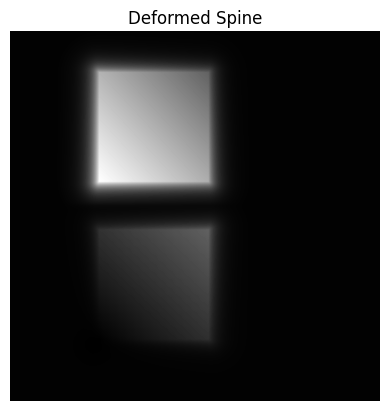

In [4]:
#create it
deformation_field,mask,segmentation_deformation_field = create_linear_deformation_field(segmentation_map,100)
perlin_scaled = scale_perlin_by_distance(perlin_2_d,mask)
final_deformation_field = deformation_field+perlin_scaled
# Display the grayscale image
plt.imshow(deformation_field[:,:,1], cmap='gray')
plt.title("Deformed Spine")
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


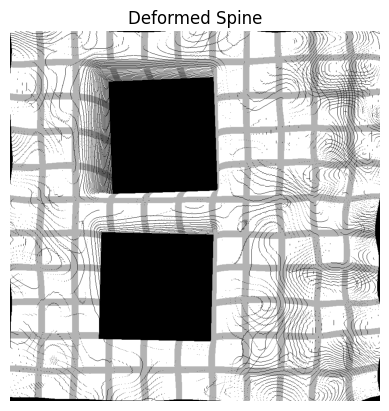

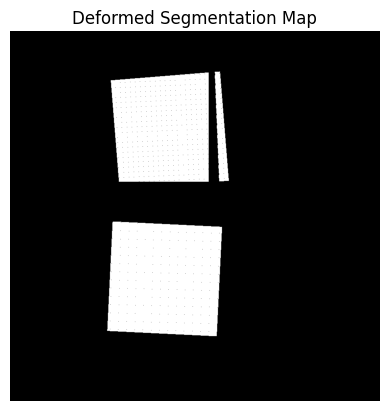

In [5]:
#apply it 
deformed_image = deform_loop(spine_array,final_deformation_field)
deformed_segmap = deform_loop(segmentation_map,segmentation_deformation_field)

# Display the grayscale image
plt.imshow(deformed_image, cmap='gray')
plt.title("Deformed Spine")
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# Display the grayscale image
plt.imshow(deformed_segmap, cmap='gray')
plt.title("Deformed Segmentation Map")
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()